In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from PIL import Image

# Input data files are available in the read-only "../input/" directory
#### importing data
with_mask_file=os.listdir('data/with_mask')
print(with_mask_file[:5])
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data/without_mask'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
data/without_mask\without_mask_1.jpg
data/without_mask\without_mask_10.jpg
data/without_mask\without_mask_100.jpg
data/without_mask\without_mask_1000.jpg
data/without_mask\without_mask_1001.jpg
data/without_mask\without_mask_1002.jpg
data/without_mask\without_mask_1003.jpg
data/without_mask\without_mask_1004.jpg
data/without_mask\without_mask_1005.jpg
data/without_mask\without_mask_1006.jpg
data/without_mask\without_mask_1007.jpg
data/without_mask\without_mask_1008.jpg
data/without_mask\without_mask_1009.jpg
data/without_mask\without_mask_101.jpg
data/without_mask\without_mask_1010.jpg
data/without_mask\without_mask_1011.jpg
data/without_mask\without_mask_1012.jpg
data/without_mask\without_mask_1013.jpg
data/without_mask\without_mask_1014.jpg
data/without_mask\without_mask_1015.jpg
data/without_mask\without_mask_1016.jpg
data/without_mask\without_mask_1017.jpg
data/without_mask\with

In [17]:
with_mask_file=os.listdir('data/with_mask')
#print(with_mask_file[:5])
print(len(with_mask_file))

without_mask_file=os.listdir('data/without_mask')
print(len(without_mask_file))

3725
3828


# adding lables

In [18]:
with_mask_labels=[1]*len(with_mask_file)
print(with_mask_labels[:5])
without_mask_labels=[0]*len(without_mask_file)
print(without_mask_labels[:5])
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# importing data

In [19]:
import os
data=[]
img_with_mask_path='data/with_mask'
img_without_mask_path='data/without_mask'
for image in with_mask_file:
      image=Image.open(img_with_mask_path+"/" + image)
      image=image.resize((28,28))
      image=image.convert('RGB')
      image=np.array(image)
      data.append(image)
      
for image in without_mask_file :
  image=Image.open(img_without_mask_path+ '/'+image)
  image=image.resize((28,28))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
print(len(data))
        #print(os.path.join(dirname, filename))

c:\Users\kiara\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553


In [20]:
data=np.array(data)
labels=np.array(labels)

# train and test spliting

In [21]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2)


# normilize

In [22]:
x_train=x_train/255
x_test=x_test/255

# model definition

In [23]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


c:\Users\kiara\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,538 (240.38 KB)

 Trainable params: 61,538 (240.38 KB)

 Non-trainable params: 0 (0.00 B)

training

In [25]:
hist=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7345 - loss: 0.5006 - val_accuracy: 0.8968 - val_loss: 0.2622
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9114 - loss: 0.2417 - val_accuracy: 0.8994 - val_loss: 0.2386
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9177 - loss: 0.2174 - val_accuracy: 0.9093 - val_loss: 0.2249
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9276 - loss: 0.1858 - val_accuracy: 0.9100 - val_loss: 0.1976
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9420 - loss: 0.1571 - val_accuracy: 0.9325 - val_loss: 0.1979
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9448 - loss: 0.1414 - val_accuracy: 0.9332 - val_loss: 0.1771
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9525 - loss: 0.1225 - val_accuracy: 0.9345 - val_loss: 0.1704
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9630 - loss: 0.0988 - val_accur

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
[[0.84780276 0.15219721]]


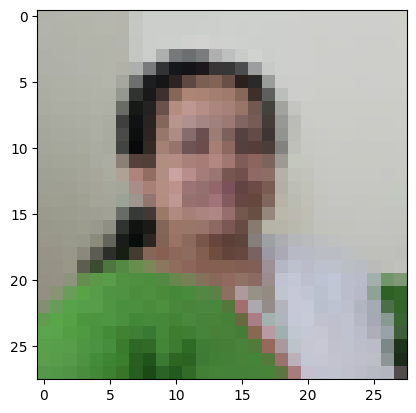

In [26]:
y_predict = model.predict(np.expand_dims(x_test[111], axis=0))
print(y_predict)
plt.imshow(x_test[111])


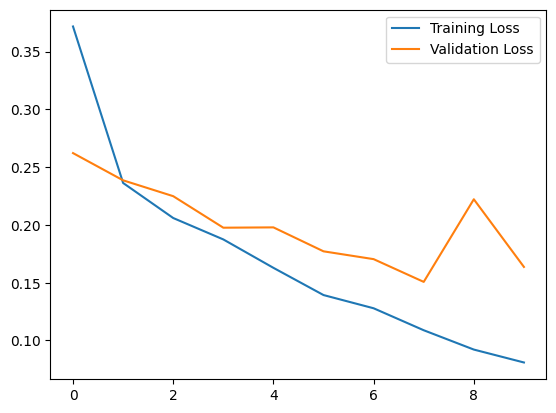

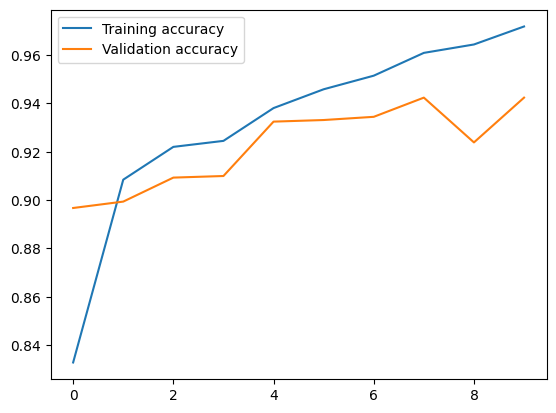

In [27]:

plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.plot(hist.history["accuracy"],label="Training accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation accuracy")
plt.legend()
plt.show()

In [28]:
model.save("mask_model.h5")
